# Aftershock pattern prediction based on earthquake rupture data for improved seismic hazard assessment

### by A. Mignan, Jan. 2019


The present project aims at forecasting the location of aftershocks that follow the occurrence of any large earthquake. While mainshocks are not (yet) predictable, aftershock statistics are sound enough for us to try predict them in reasonably small magnitude-space-time windows. For any mainshock of magnitude M occurring, Båth's law combined to the Gutenberg-Richter law tells us that there is a c. 10% chance that another earthquake (i.e. an aftershock) of the same magnitude or greater will occur (_Båth_, 1965; _Gutenberg & Richter_, 1944). Aftershocks are also most likely to occur just after the mainshock with their likelihood decreasing with time (_Mignan_, 2015 and references therein). Predicting where they are most likely to occur represents an important endeavour to improve time-dependent seismic hazard and risk assessment (e.g. _Mignan et al._, 2018). So far, the preferred model to predict aftershock spatial patterns is the Coulomb stress model (e.g. _King et al._, 1994). Recent results (_De Vries et al._, 2018) as well as the present project show that machine learning (ML) can significantly improve those predictions.

Our work is based on the recent article '_Deep learning of aftershock patterns following large earthquakes_' by Phoebe M. R. DeVries, Fernanda Viégas, Martin Wattenberg & Brendan J. Meade, published in Nature in 2018 (https://www.nature.com/articles/s41586-018-0438-y ). We will refer to that study as DeVries18 hereafter. To the best of our knowledge, this is the first study to use ML (here deep learning) to predict the spatial patterns of aftershocks. As such, DeVries18 represents a milestone in earthquake ML research. It also provides us a framework upon which we can test new models and develop new hypotheses and products.

Our results can be summarized as follows:
-  The DeVries18 results are first reproduced ([AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) = 85%). This model (deep neural network (DNN) 12 - 50 - 50 - 50 - 50 - 50 -50 - 1) is then used as baseline;
-  Since DeVries only used 12 stress-related features, we test simpler DNN topologies. A new DNN 12 - 8 - 8 - 1 yields a similar performance (AUC = 85%);
-  Since (1) stress computation (i.e. mapping of deformation to stress via geometric operations; _King et al._, 1994) is computationally intensive and cumbersome, and since (2) neural networks can be interpreted as geometric operations themselves, we bypass stress computation entirely and define features based on mainshock rupture geometry and kinematics instead;
-  We find that a DNN (2 - 6 - 6 - 1) with only two features (minimum distance to rupture and mean rupture slip) yields a similar performance (AUC = 85%);
-  Since aftershock patterns are in fact relatively simple at first order (_Mignan_, 2018), an artificial neural network (ANN, 2 - 30 - 1), based on the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem), yields a similar performance (AUC = 85%).

This is an example of [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor) in action. In view of the AI/earthquake-prediction buzz observed in the media (see inset below), one could have imagined that afterhosks represent a complex problem that only artificial intelligence can solve. Although ML helps us better predicting aftershock patterns, there is nothing magical about it. No deep learning was in fact needed with aftershock patterns already well described by only 2 features, which is in agreement with any visual inspection of the aftershock data.

The impact of these new results is twofold:
-  By bypassing stress computation entirely, using a simple ANN topology, and only 2 mainshock-rupture-based features, we can streamline the process of aftershock pattern prediction for future post-mainshock crisis management (i.e. process faster and more transparent);
-  In our in-depth analysis, we were not able to obtain performances higher than AUC = 86% despite using stress, or geometry and kinematics, and this for various hyperparameterizations. This infers that important features are missing. Observing past aftershock patterns, we suggest that performance could be further improved if the location of nearby faults were included. Testing this hypothesis is however out of the scope of the present project.

***

<img src="https://static01.nyt.com/images/2018/10/28/business/28Earthquakes-illo/28Earthquakes-illo-articleLarge-v2.gif" alt="Alt text that describes the graphic" title="Title text" style="float: left" width="300px" />

&nbsp; The DeVries18 work has been widely publicised in the media:<br>
&nbsp; **Nature**: '[Artificial intelligence nails predictions of earthquake aftershocks](https://www.nature.com/articles/d41586-018-06091-z)'<br>
&nbsp; **The Verge**: '[Google and Harvard team up to use deep learning to predict earthquake aftershocks](https://www.theverge.com/2018/8/30/17799356/ai-predict-earthquake-aftershocks-google-harvard)'<br>
&nbsp; **Futurism**: '[GOOGLE’S AI CAN HELP PREDICT WHERE EARTHQUAKE AFTERSHOCKS ARE MOST LIKELY](https://futurism.com/the-byte/aftershocks-earthquake-prediction)'<br>
&nbsp; **Phys.org**: '[OK computer: How AI could help forecast quake aftershocks](https://phys.org/news/2018-08-ai-quake-aftershocks.html)'<br>
&nbsp; **Fortune**: '[Why We'll Want AI to Help Us When the Big One Arrives](http://fortune.com/2018/08/31/ai-earthquake-prediction-seismology/)'<br>
&nbsp; **The New York Times**: '[A.I. Is Helping Scientists Predict When and Where the Next Big Earthquake Will Be](https://www.nytimes.com/2018/10/26/technology/earthquake-predictions-artificial-intelligence.html)'<br>

&nbsp; _Animation Credit_: Jean-Francois Podevin, in the [NYT](https://www.nytimes.com/2018/10/26/technology/earthquake-predictions-artificial-intelligence.html) article.

***

Note that all the steps of the project - from preliminary data exploration to model evaluation, via ETL, feature engineering and model training - can be reproduced by running the jupyter notebooks listed at the end of this document. All codes are fully documented. Note that we used IBM Watson Studio and Python 3.5 as development environment. Below are snippets from the model evaluation step.

In [9]:
# first note the dependance on the previous steps of the process model
!ls

Features_DeVries18.pkl				model_XGBoost.joblib
Features_new.pkl				None0000000.png
LabelledDataset_DeVries18_balanced.pkl		pred_seism_aftXYZ
LabelledDataset_DeVries18.pkl			srcmod2.py
model_ANN_init.h5				SRCMOD_cleaned.pkl
model_ANN_trained.h5				Testing_FileNames.h5
model_baseline_DeVries18_init.h5		TestingSet_X_DeVries18.pkl
model_baseline_DeVries18_simplified_init.h5	TestingSet_X_new.pkl
model_baseline_DeVries18_simplified_trained.h5	TestingSet_y_DeVries18.pkl
model_baseline_DeVries18_trained.h5		TestingSet_y_new.pkl
model_DNN_init.h5				Training_FileNames.h5
model_DNN_trained.h5


In [10]:
import pandas as pd
import keras
from keras.models import load_model

# 12 features (stress-related) from the baseline model (DeVries18)
x_test_DeVries18 = pd.read_pickle('TestingSet_X_DeVries18.pkl')
y_test = pd.read_pickle('TestingSet_y_DeVries18.pkl')

# 2 new features (geometry & kinematics)
x_test_new = pd.read_pickle('TestingSet_X_new.pkl')

# load trained models
baselinemodel_DeVries18 = load_model('model_baseline_DeVries18_trained.h5')
baselinemodel_DeVries18_simplified = load_model('model_baseline_DeVries18_simplified_trained.h5')
model_DNN = load_model('model_DNN_trained.h5')
model_ANN = load_model('model_ANN_trained.h5')

In [11]:
baselinemodel_DeVries18.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                2550      
__________

In [12]:
model_ANN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 30)                90        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


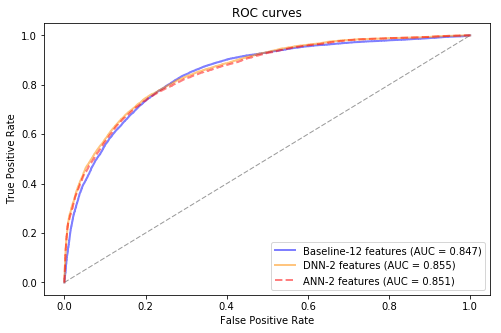

In [13]:
import sklearn
from sklearn import metrics

# Baseline model (DeVries18)
predictions_baseline = baselinemodel_DeVries18.predict(x_test_DeVries18)
fpr_baseline, tpr_baseline, _ = metrics.roc_curve(pd.DataFrame.as_matrix(y_test), predictions_baseline)
AUC_baseline = metrics.auc(fpr_baseline, tpr_baseline)
# simplified baseline model
predictions_baseline_simplified = baselinemodel_DeVries18_simplified.predict(x_test_DeVries18)
fpr_baseline_simplified, tpr_baseline_simplified, _ = metrics.roc_curve(pd.DataFrame.as_matrix(y_test), predictions_baseline_simplified)
AUC_baseline_simplified = metrics.auc(fpr_baseline_simplified, tpr_baseline_simplified)
# new DNN model (2 features: geometric & kinematic)
predictions_DNN = model_DNN.predict(x_test_new)
fpr_DNN, tpr_DNN, _ = sklearn.metrics.roc_curve(pd.DataFrame.as_matrix(y_test), predictions_DNN)
AUC_DNN = sklearn.metrics.auc(fpr_DNN, tpr_DNN)
# ANN model (2 features: geometric & kinematic)
predictions_ANN = model_ANN.predict(x_test_new)
fpr_ANN, tpr_ANN, _ = sklearn.metrics.roc_curve(pd.DataFrame.as_matrix(y_test), predictions_ANN)
AUC_ANN = sklearn.metrics.auc(fpr_ANN, tpr_ANN)

from matplotlib import pyplot as plt 

# combine 3 roc curves
plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], linestyle='--', dashes=(5, 2), linewidth=1, color=[0.6, 0.6, 0.6])
plt.plot(fpr_baseline, tpr_baseline, 'b', linewidth=2, alpha = 0.5, label='Baseline-12 features (AUC = %0.3f)' % AUC_baseline)
plt.plot(fpr_DNN, tpr_DNN, 'darkorange', linewidth=2, alpha = 0.5, label='DNN-2 features (AUC = %0.3f)' % AUC_DNN)
plt.plot(fpr_ANN, tpr_ANN, 'r', linewidth=2, alpha = 0.5, linestyle='--', label='ANN-2 features (AUC = %0.3f)' % AUC_ANN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

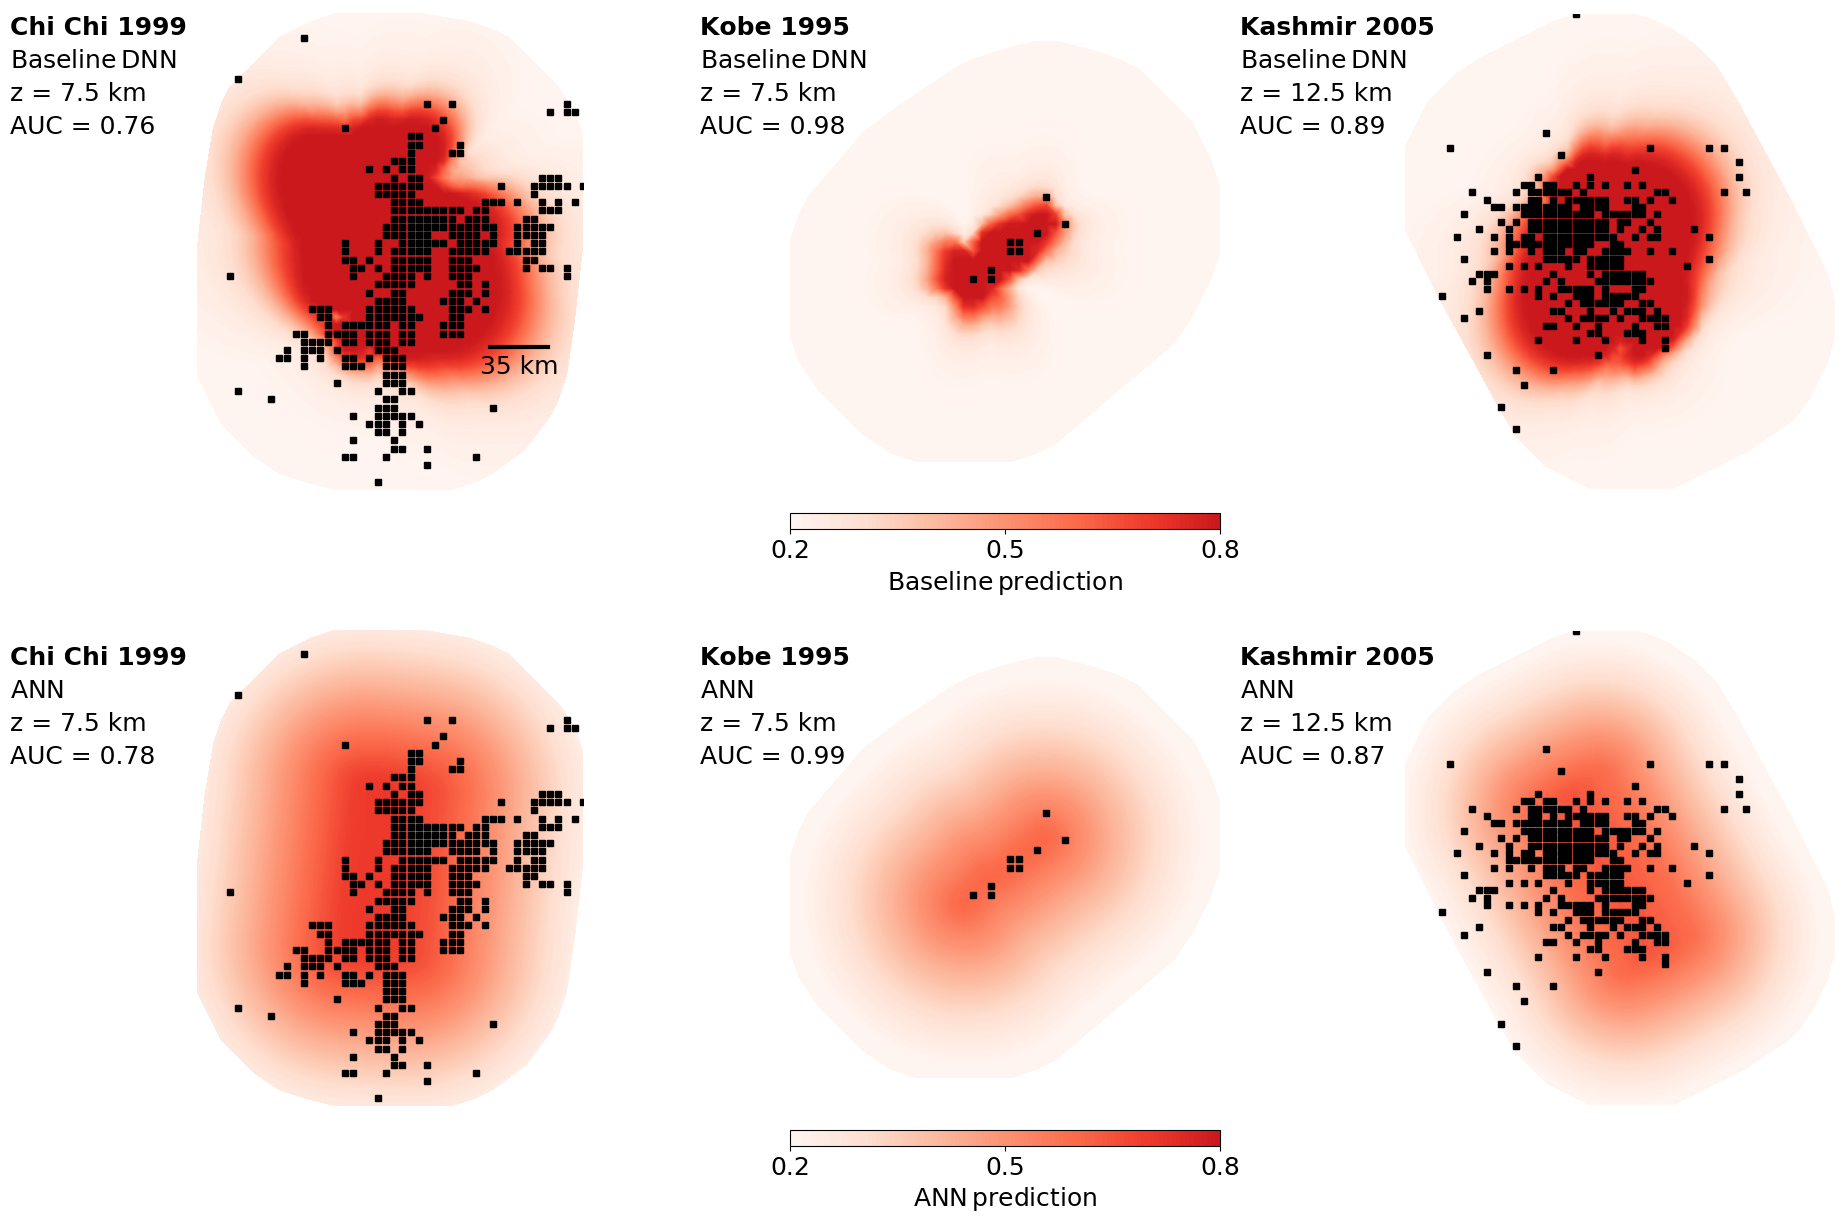

In [14]:
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from matplotlib.colorbar import Colorbar

# input data
df_DeVries18 = pd.read_pickle('LabelledDataset_DeVries18.pkl')
SRCMOD_dictList = pd.read_pickle('SRCMOD_cleaned.pkl')   #mainshock rupture model data - used to define the new features

# selected trained models
baselinemodel_DeVries18 = load_model('model_baseline_DeVries18_trained.h5')
model_ANN = load_model('model_ANN_trained.h5')


#code modified from PlotThreeTestCases.py of DeVries18
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

#define figure parameters
min_val_big = 0.2
max_val_big = 0.8
fontsize = 18  #22
#slip distributions to plot
eventTags = ['s1999CHICHI01MAxx', 's1995KOBEJA01YOSH', 's2005KASHMI01SHAO']
sublabels = [['Chi Chi 1999', 'Kobe 1995', 'Kashmir 2005'] ,['Chi Chi 1999', 'Kobe 1995', 'Kashmir 2005']]

fig = plt.figure(facecolor='white', figsize=(30, 15), dpi=100)
depth_vec = [-7500., -7500., -12500.]
plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
gs = gridspec.GridSpec(4, 8,
                       width_ratios=[1, .2, 1, .2, 1, .2, 1, .001],
                       height_ratios=[30, 1, 30, 1]
                       )
rowscale = 2
cmap = plt.get_cmap('Reds')
new_cmap = truncate_colormap(cmap, 0.0, 0.75)

#loop over slip distributions
for i in range(len(eventTags)):

    #read in data
    df_eventTag = df_DeVries18.loc[(df_DeVries18['ID'] == eventTags[i])
                                & (df_DeVries18['z'] == depth_vec[i])]
    grid_aftershock_count = np.double(df_eventTag['aftershocksyn'])

    #BASELINE: run model prediction for this slip distribution - we first define the 12 features
    df_eventTag_DeVries18_origFeatures = df_eventTag[['stresses_full_xx', 'stresses_full_xy',
       'stresses_full_yy', 'stresses_full_xz', 'stresses_full_yz', 'stresses_full_zz',
       'aftershocksyn', 'ID']]
    origFeatures = ['stresses_full_xx', 'stresses_full_xy', 'stresses_full_yy', 'stresses_full_xz', 'stresses_full_yz', 'stresses_full_zz']
    posabs = ['posabsxx', 'posabsxy', 'posabsyy', 'posabsxz', 'posabsyz', 'posabszz']
    negabs = ['negabsxx', 'negabsxy', 'negabsyy', 'negabsxz', 'negabsyz', 'negabszz']
    df_eventTag_DeVries18_engFeatures = pd.DataFrame()
    df_eventTag_DeVries18_engFeatures[['ID', 'aftershocksyn']] = df_eventTag_DeVries18_origFeatures[['ID', 'aftershocksyn']]
    df_eventTag_DeVries18_engFeatures[posabs] = abs(df_eventTag_DeVries18_origFeatures[origFeatures]) * 1e-6
    df_eventTag_DeVries18_engFeatures[negabs] = -abs(df_eventTag_DeVries18_origFeatures[origFeatures]) * 1e-6
    features = ['posabsxx', 'posabsxy', 'posabsyy', 'posabsxz', 'posabsyz', 'posabszz',
           'negabsxx', 'negabsxy', 'negabsyy', 'negabsxz', 'negabsyz', 'negabszz']
    target = 'aftershocksyn'
    x_test_EventTag = df_eventTag_DeVries18_engFeatures[features]
    y_test_EventTag = df_eventTag_DeVries18_engFeatures[target]
    pred_baseline = baselinemodel_DeVries18.predict(x_test_EventTag)
    
    
    #ANN: run model prediction for this slip distribution - we first define the 2 new features
    for j in range(len(SRCMOD_dictList)):
        if SRCMOD_dictList[j]['ID'] == eventTags[i]:
            SRCMOD_eventTag = SRCMOD_dictList[j]

    feature_mindist = []
    feature_slipMean = []
    for j in range(len(df_eventTag)):
        x_cell = df_eventTag['x'].iloc[j]
        y_cell = df_eventTag['y'].iloc[j]
        z_cell = df_eventTag['z'].iloc[j]
        ID_cell = df_eventTag['ID'].iloc[j]    
        #new features
        x_flt = SRCMOD_eventTag['x']
        y_flt = SRCMOD_eventTag['y']
        z_flt = SRCMOD_eventTag['z']
        dist2cell = np.sqrt(np.power((x_flt - x_cell), 2) + 
                            np.power((y_flt - y_cell), 2) + 
                            np.power((z_flt - z_cell), 2))
        feature_mindist.append(min(dist2cell))        
        feature_slipMean.append(np.mean(SRCMOD_eventTag['slip']))
        
    df_eventTag_NewFeatures = df_eventTag[['ID', 'aftershocksyn']]  #ID and target
    df_eventTag_NewFeatures['mindist'] = feature_mindist
    df_eventTag_NewFeatures['slipMean'] = feature_slipMean
    # select features & normalise
    df_x = df_eventTag_NewFeatures[['mindist', 'slipMean']]
    min_mindist = 0
    max_mindist = 300000
    min_slipMean = 0
    max_slipMean = 20
    df_x_norm = df_x
    df_x_norm['mindist'] = (df_x_norm['mindist']-min_mindist)/(max_mindist-min_mindist)
    df_x_norm['slipMean'] = (df_x_norm['slipMean']-min_slipMean)/(max_slipMean-min_slipMean)
    df_NewFeatures_norm = df_x_norm
    df_NewFeatures_norm[['ID', 'aftershocksyn']] = df_eventTag_NewFeatures[['ID', 'aftershocksyn']]
    features = ['mindist', 'slipMean']
    target = 'aftershocksyn'
    x_test_EventTag = df_NewFeatures_norm[features]
#    y_test_EventTag = df_NewFeatures_norm[target]
    pred_ANN = model_ANN.predict(x_test_EventTag)
    
    # AUC estimates
    fpr_baseline, tpr_baseline, _ = metrics.roc_curve(y_test_EventTag, pred_baseline)
    auc_baseline = metrics.auc(fpr_baseline, tpr_baseline)
    fpr_ANN, tpr_ANN, _ = sklearn.metrics.roc_curve(y_test_EventTag, pred_ANN)
    auc_ANN = metrics.auc(fpr_ANN, tpr_ANN)
    
    x_temp = np.double(df_eventTag['x'])
    y_temp = np.double(df_eventTag['y'])
    grid_aftershock_count_temp = np.double(df_eventTag['aftershocksyn'])

    for j in range(0, 2):
       ax = plt.subplot(gs[j*2, i*rowscale])
       contour_levels = np.linspace(min_val_big, max_val_big, 100)

       if j==0: #if baseline
           field_temp = pred_baseline
       else: #if DNN
           field_temp = pred_ANN

       field_temp = field_temp[:,0]
       field_temp[np.where(field_temp>=max_val_big)] = max_val_big - 0.001
       field_temp[np.where(field_temp<min_val_big)] = min_val_big + 0.001
       cs = plt.tricontourf(x_temp, y_temp, field_temp, contour_levels, cmap=new_cmap, origin='lower', hold='on', vmin=min_val_big, vmax=max_val_big, lw = 0.1)
       cs = plt.tricontourf(x_temp, y_temp, field_temp, contour_levels, cmap=new_cmap, origin='lower', hold='on', vmin=min_val_big, vmax=max_val_big)
       plt.clim(min_val_big, max_val_big)

       #deal with scale bar
       if ((i == 0) & (j == 0)): #plot scale bar in first subplot
            range_x = np.max(x_temp)-np.min(x_temp)
            range_y = np.max(y_temp)-np.min(y_temp)
            startx = np.min(x_temp)+ 0.76*range_x
            starty = np.min(y_temp)+ 0.3*range_y
            plt.plot([startx, startx+35000], [starty, starty], 'k', linewidth=3)
            plt.text(startx+17500, starty-12000, '35 km', fontsize=fontsize, ha='center', va='center')

       #deal with colorbars
       if ((i == 1) & (j == 0)): # plot first color bar in row 1
            colorax = plt.subplot(gs[1, rowscale])
            colorbar1 = Colorbar(ax = colorax, mappable = cs, orientation = 'horizontal', ticklocation = 'bottom', ticks = [0.2, 0.5, 0.8])
            colorbar1.ax.tick_params(labelsize=fontsize)
            colorbar1.set_label('$\mathrm{Baseline}\,\mathrm{prediction}$', size=fontsize)
            pos = colorax.get_position() # get the original position
            colorax.set_position([pos.x0, pos.y0+0.017, pos.width, pos.height])
       if ((i == 1) & (j == 1)): # plot first color bar in row 3
            colorax = plt.subplot(gs[j*2+1, i*rowscale])
            colorbar2 = Colorbar(ax = colorax, mappable = cs, orientation = 'horizontal', ticklocation = 'bottom', ticks = [0.2, 0.5, 0.8])
            colorbar2.ax.tick_params(labelsize=fontsize)
            colorbar2.set_label('$\mathrm{ANN}\,\mathrm{prediction}$', size=fontsize)
            pos = colorax.get_position() # get the original position
            colorax.set_position([pos.x0, pos.y0, pos.width, pos.height])

       ax = plt.subplot(gs[j*2, i*rowscale])

#       slip_flt = np.asarray(SRCMOD_eventTag['slip'])
#       color_slip = [str(item/255.) for item in slip_flt]
#       plt.scatter(x_flt, y_flt, c=color_slip, marker='o', s=20)
    
       # count and plot aftershocks at the depth of interest
       n_cells = 0
       for i_isc in range(0, len(x_temp)):
          if grid_aftershock_count_temp[i_isc] > 0:
            plt.plot(x_temp[i_isc], y_temp[i_isc], 's', color = [0.0, 0.0, 0.0], markersize=5)
            n_cells += 1

       # add labels
       xpos = [0.07, 0.3, 0.48, 0.67]
       ypos = [0.87, 0.45]
       spacing = 0.022
       stringlabel = sublabels[j][i]
       plt.text(xpos[i], ypos[j], stringlabel, fontweight = 'bold', fontsize=fontsize, ha='left', va='center', transform=fig.transFigure)
       if j == 0: plt.text(xpos[i], ypos[j]-spacing, '$\mathrm{Baseline}\,\mathrm{DNN}$', fontsize=fontsize, ha='left', va='center',transform=fig.transFigure)
       if j == 1: plt.text(xpos[i], ypos[j]-spacing, '$\mathrm{ANN}$', fontsize=fontsize, ha='left', va='center',transform=fig.transFigure)
       plt.text(xpos[i], ypos[j]-2*spacing, 'z = ' + str(abs(depth_vec[i])/1e3) + ' km', fontsize=fontsize, ha='left', va='center', transform=fig.transFigure)
       if j == 0: plt.text(xpos[i], ypos[j]-3*spacing, 'AUC = ' + str(round(auc_baseline,2)), fontsize=fontsize, ha='left', va='center', transform=fig.transFigure)
       if j == 1: plt.text(xpos[i], ypos[j]-3*spacing, 'AUC = ' + str(round(auc_ANN,2)), fontsize=fontsize, ha='left', va='center', transform=fig.transFigure)
       pos = ax.get_position() # get the original position
       if j == 1: ax.set_position([pos.x0, pos.y0-0.017, pos.width, pos.height])

       #plot decorations
       plt.axis('equal')
       plt.axis('tight')
       plt.axis('scaled')
       plt.axis('off')
       ax.set_xticks([])
       ax.set_yticks([])


## References

-  Båth, M. (1965), Lateral inhomogeneities of the upper mantle. Tectonophysics, 2, 483-514
-  De Vries, P.M.R., F. Viégas, M. Wattenberg & B.J. Meade (2018), Deep learning of aftershock patterns following large earthquakes. Nature, 560, 632-634, doi: 10.1038/s41586-018-0438-y
-  Gutenberg, B. & C.F. Richter (1944), Frequency of earthquakes in California. Bull. Seismol. Soc. Am., 34, 184-188
-  King, G.C.P., R.S. Stein & J. Lin (1994), Static Stress Changes and the Triggering of Earthquakes. Bull. Seismol. Soc. Am., 84, 935-953
-  Mignan, A. (2015), Modeling aftershocks as a stretched exponential relaxation. Geophys. Res. Lett., 42, 9726-9732, doi: 10.1002/2015GL066232
-  Mignan, A. (2018), Utsu aftershock productivity law explained from geometric operations on the permanent static stress field of mainshocks. Nonlin. Processes Geophys., 25, 241-250, doi: 10.5194/npg-25-241-2018
-  Mignan, A., L. Danciu & D. Giardini (2018), Considering large earthquake clustering in seismic risk analysis. Nat. Hazards, 91, S149-S172, doi: 10.1007/s11069-016-2549-9 (in section 'Recent Innovations in Hazard and Risk Analysis')

## Acknowledgements

I thank Phoebe M. R. DeVries, Fernanda Viégas, Martin Wattenberg & Brendan J. Meade for making their codes and data publicly available. I'm also grateful to the IBM Coursera team for giving me the opportunity to test my new skills in my earthquake work via this Capstone project.

## Codes & Data

### Jupyter Notebooks

All steps of the project's process model are available as jupyter notebooks on Arnaud Mignan's GitHub repository: https://github.com/amignan/pred_seism_aftXYZ (we use https://nbviewer.jupyter.org/ when the notebook contains animations).

-  Initial Data Exploration: https://nbviewer.jupyter.org/github/amignan/pred_seism_aftXYZ/blob/master/notebooks/pred_seism_aftXYZ.data_exp.ipynb
-  Extract-Transform-Load (ETL): https://github.com/amignan/pred_seism_aftXYZ/blob/master/notebooks/pred_seism_aftXYZ.etl.ipynb
-  Feature Creation: https://nbviewer.jupyter.org/github/amignan/pred_seism_aftXYZ/blob/master/notebooks/pred_seism_aftXYZ.feature_eng.ipynb
-  Model Definition: https://github.com/amignan/pred_seism_aftXYZ/blob/master/notebooks/pred_seism_aftXYZ.model_def.ipynb
-  Model Training: https://github.com/amignan/pred_seism_aftXYZ/blob/master/notebooks/pred_seism_aftXYZ.model_train.ipynb
-  Model Evaluation: https://github.com/amignan/pred_seism_aftXYZ/blob/master/notebooks/pred_seism_aftXYZ.model_evaluate.ipynb
-  Model Deployment: _the present notebook_

### Data sources

All the data used in this project are publicly available:

-  Codes of DeVries18 (with links to their I/O data): https://github.com/phoebemrdevries/Learning-aftershock-location-patterns 
-  DeVries18 labelled dataset: https://drive.google.com/drive/folders/1c5Rb_6EsuP2XedDjg37bFDyf8AadtGDa
-  SRCMOD mainshock rupture models (for new feature definition): http://equake-rc.info/SRCMOD/
-  Codes from Google on stress transfer (for SRCMOD fsp file reformating): https://github.com/google/stress_transfer/tree/master/stress_transfer